# Modelling of France Accidents

**Cohort:** mar23_accidents

**Author:** Johanna Starkl

**Date:** 29 October 2023

### Decision Tree with target variable severe



## Loading of required libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

## Importing the data

In [2]:
df = pd.read_csv('./data/231018_clean_table_for_analysis.csv', low_memory = False, index_col = 0)

## Data description
### Data

In [3]:
df.head()

,place,catu,sexe,an_nais,trajet,locp,an,mois,jour,lum,...,holiday,datetime,timestamp,actp,num_veh,hrmn,grav,etatp,hour_of_day,day_of_week
Num_Acc,,,,,,,,,,,,,,,,,,,,,
201900000001,2.0,2,2,2002,0.0,-1.0,2019,11,30,4,...,NaN,2019-11-30 01:30:00,1.575074e+09,0,14,90,3,0,1,Saturday
201900000001,1.0,1,2,1993,5.0,-1.0,2019,11,30,4,...,NaN,2019-11-30 01:30:00,1.575074e+09,0,14,90,3,0,1,Saturday
201900000001,1.0,1,1,1959,0.0,-1.0,2019,11,30,4,...,NaN,2019-11-30 01:30:00,1.575074e+09,0,0,90,0,0,1,Saturday
201900000002,1.0,1,2,1994,0.0,-1.0,2019,11,30,3,...,NaN,2019-11-30 02:50:00,1.575079e+09,0,0,170,3,0,2,Saturday
201900000003,1.0,1,1,1996,0.0,-1.0,2019,11,28,1,...,NaN,2019-11-28 15:15:00,1.574950e+09,1,0,915,0,0,15,Thursday


### Data types

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2421684 entries, 201900000001 to 201800055766
Data columns (total 43 columns):
 #   Column       Dtype  
---  ------       -----  
 0   place        float64
 1   catu         int64  
 2   sexe         int64  
 3   an_nais      int64  
 4   trajet       float64
 5   locp         float64
 6   an           int64  
 7   mois         int64  
 8   jour         int64  
 9   lum          int64  
 10  agg          int64  
 11  int          int64  
 12  atm          float64
 13  col          float64
 14  dep          int64  
 15  catr         float64
 16  circ         float64
 17  nbv          float64
 18  vosp         float64
 19  prof         float64
 20  plan         float64
 21  surf         float64
 22  infra        float64
 23  situ         float64
 24  senc         float64
 25  catv         int64  
 26  occutc       float64
 27  obs          float64
 28  obsm         float64
 29  choc         float64
 30  manv         float64
 31  date         

### Missing data

In [5]:
df.isna().sum()

place                0
catu                 0
sexe                 0
an_nais              0
trajet               0
locp                 0
an                   0
mois                 0
jour                 0
lum                  0
agg                  0
int                  0
atm                  0
col                  0
dep                  0
catr                 0
circ                 0
nbv                  0
vosp                 0
prof                 0
plan                 0
surf                 0
infra                0
situ                 0
senc                 0
catv                 0
occutc               0
obs                  0
obsm                 0
choc                 0
manv                 0
date                 0
is_holiday           0
holiday        2367768
datetime             0
timestamp            0
actp                 0
num_veh              0
hrmn                 0
grav                 0
etatp                0
hour_of_day          0
day_of_week          0
dtype: int6

This data has no missing values, accept the `holiday` variable which contains the name of the holiday or NaN.

### Drop variables
The dataset contains still some variables that represent information represented by other variables or are a finer granulation. The latter might be added later, if the primary variable is relevant.

- `holiday`: classifies the holiday, but will be used only, if `is_holiday` is relevant

In [6]:
columns_drop = ['holiday', 'datetime']

df.drop(columns = columns_drop, inplace = True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2421684 entries, 201900000001 to 201800055766
Data columns (total 41 columns):
 #   Column       Dtype  
---  ------       -----  
 0   place        float64
 1   catu         int64  
 2   sexe         int64  
 3   an_nais      int64  
 4   trajet       float64
 5   locp         float64
 6   an           int64  
 7   mois         int64  
 8   jour         int64  
 9   lum          int64  
 10  agg          int64  
 11  int          int64  
 12  atm          float64
 13  col          float64
 14  dep          int64  
 15  catr         float64
 16  circ         float64
 17  nbv          float64
 18  vosp         float64
 19  prof         float64
 20  plan         float64
 21  surf         float64
 22  infra        float64
 23  situ         float64
 24  senc         float64
 25  catv         int64  
 26  occutc       float64
 27  obs          float64
 28  obsm         float64
 29  choc         float64
 30  manv         float64
 31  date         

## Data preparation
### Transform data types
#### Date and time variables
The date and time variables are maybe important as grouping variables or as contrains for time dependent severity of accidents.

_Problem_:

Due to the export to `csv`, the `datatime` data time is lost and thus, it is required to assign it again.

**Steps:**
1. Transform `date` and `hrmn` to `datetime` type.nais` to integer and `date` to `date`.

In [8]:
# Fixing the hrmn issue:
# Transform `date`
df = df.assign(date = pd.to_datetime(df['date']))
df = df.assign(hrmn = pd.to_datetime(df['hrmn']))

In [9]:
df['date'] = df.apply(lambda x: int(x['date'].timestamp()), axis = 1)
df['hrmn'] = df.apply(lambda x: int(x['hrmn'].timestamp()), axis = 1)

In [10]:
# Encoding the variables datetime and day_of_week with Label Encoder

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df['day_of_week']=le.fit_transform(df['day_of_week'])

In [11]:
df.head()

,place,catu,sexe,an_nais,trajet,locp,an,mois,jour,lum,...,date,is_holiday,timestamp,actp,num_veh,hrmn,grav,etatp,hour_of_day,day_of_week
Num_Acc,,,,,,,,,,,,,,,,,,,,,
201900000001,2.0,2,2,2002,0.0,-1.0,2019,11,30,4,...,1575072000,False,1.575074e+09,0,14,0,3,0,1,2
201900000001,1.0,1,2,1993,5.0,-1.0,2019,11,30,4,...,1575072000,False,1.575074e+09,0,14,0,3,0,1,2
201900000001,1.0,1,1,1959,0.0,-1.0,2019,11,30,4,...,1575072000,False,1.575074e+09,0,0,0,0,0,1,2
201900000002,1.0,1,2,1994,0.0,-1.0,2019,11,30,3,...,1575072000,False,1.575079e+09,0,0,0,3,0,2,2
201900000003,1.0,1,1,1996,0.0,-1.0,2019,11,28,1,...,1574899200,False,1.574950e+09,1,0,0,0,0,15,4


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2421684 entries, 201900000001 to 201800055766
Data columns (total 41 columns):
 #   Column       Dtype  
---  ------       -----  
 0   place        float64
 1   catu         int64  
 2   sexe         int64  
 3   an_nais      int64  
 4   trajet       float64
 5   locp         float64
 6   an           int64  
 7   mois         int64  
 8   jour         int64  
 9   lum          int64  
 10  agg          int64  
 11  int          int64  
 12  atm          float64
 13  col          float64
 14  dep          int64  
 15  catr         float64
 16  circ         float64
 17  nbv          float64
 18  vosp         float64
 19  prof         float64
 20  plan         float64
 21  surf         float64
 22  infra        float64
 23  situ         float64
 24  senc         float64
 25  catv         int64  
 26  occutc       float64
 27  obs          float64
 28  obsm         float64
 29  choc         float64
 30  manv         float64
 31  date         

#### Aggregation and encoding of the target variable
In the previous notebook, we used the `grav` variable as is without any further processing. The modelling result was not satisfying. Therefore, it was decided to aggregate the four classes into two classes "severe" and "non-severe" encoded in `[1,0]`.

In [13]:
# Encoding
df['severe'] = np.where(df['grav'].isin([0, 1]), 0, 1)

In [14]:
df.severe.unique()

array([1, 0])

The following visualisation shows the balance between the two classes. The dataset is much more balanced now compared to the four classes `grav`.

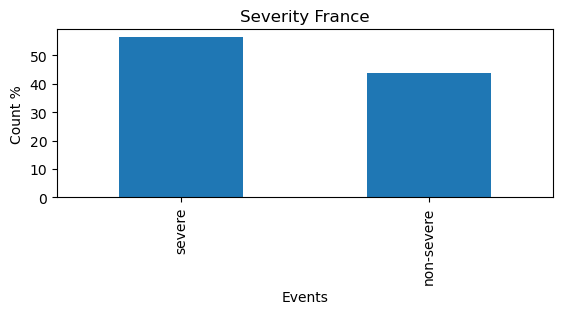

In [15]:
# checking the variables graphically and their distribution
import matplotlib.pyplot as plt
# exploring severe cases in % 
event_counts = df['severe'].value_counts()
event_percentages = (event_counts / event_counts.sum()) * 100
plt.subplot(2,1,1)
event_percentages.plot.bar()
labels = ['severe','non-severe']
# Add labels and title to the plot
plt.xticks(range(len(event_counts)), labels)
plt.xlabel('Events')
plt.ylabel('Count %')
plt.title('Severity France')
# Display the plot
plt.show()

### Preparation of the training and test datasets
#### Split data
The dataset is split by year slides. We decided to drop the Covid-19 years 2020-21. The years 2005 to 2017 are selected for the train dataset and the years 2018 and 2019 for the test dataset. Furthermore, the `grav` variable is dropped because it is encoded in `severe`.


In [16]:
df.drop('grav', axis = 1, inplace = True)

In [17]:
# split the dataset to train and test data
X_train = df.loc[df['an'] < 2018]
X_train = X_train.drop('severe', axis = 1)

X_test = df[(df['an'] >= 2018) & (df['an'] < 2020)]
X_test = X_test.drop('severe', axis = 1)

y_train = df['severe'].loc[df['an'] < 2018]
y_test = df['severe'][(df['an'] >= 2018) & (df['an'] < 2020)]



y_train = le.fit_transform(y_train)
y_test = le.fit_transform(y_test)


### Modelling the data using a Randon Forest classifier with 100 estimators

In [19]:
#DecisionTree Classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV


# Tuning the parameters to find the best decision tree model - start params chosen randomly
model = DecisionTreeClassifier(random_state=50)

param_dist = {'criterion': ['gini', 'entropy'],
              'max_depth': [2, 4, 6, 8, 10], 
              'min_samples_leaf' : [1, 2, 3], 
              'min_samples_split' : [2, 3, 4], 
              'ccp_alpha': [0.1, 0.01, 0.001]}
            

cv_dt = GridSearchCV(model, param_grid=param_dist, n_jobs=-1)

cv_dt.fit(X_train, y_train)
print('Best Parameters using grid search: \n')
print(cv_dt.best_params_)

Best Parameters using grid search: 

{'ccp_alpha': 0.001, 'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}


### Train with best parameters

In [30]:
# Training with the best parameters

tree = DecisionTreeClassifier(criterion='entropy', random_state = 50, max_depth=10, min_samples_leaf=1, min_samples_split=2, ccp_alpha=0.001)
tree.fit(X_train, y_train)
y_pred = tree.predict(X_test)

print('Accuracy Score: ',accuracy_score(y_test, y_pred))

Accuracy Score:  0.7517502372698284


### Classification Report

In [38]:
print('Classification Report')
print(classification_report(y_test, y_pred))



Classification Report
              precision    recall  f1-score   support

           0       0.74      0.67      0.71    111446
           1       0.76      0.82      0.79    140377

    accuracy                           0.75    251823
   macro avg       0.75      0.74      0.75    251823
weighted avg       0.75      0.75      0.75    251823



### Confusion Matrix

In [39]:
pd.crosstab(y_test, y_pred, rownames=['Reality'], colnames=['Prediction'])


Prediction,0,1
Reality,,
0,74724,36722
1,25793,114584


In [40]:
total_samples = matrix.sum()

# Calculate the percentages
percentages = (matrix / total_samples) * 100

# Create a DataFrame from the percentages
class_names = df.severe.values
dataframe = pd.DataFrame(percentages, index=['non-fatal', 'fatal'], columns=['non-fatal', 'fatal'])

# Display the confusion matrix as percentages
print("Confusion Matrix (Percentages):")
print(dataframe)

Confusion Matrix (Percentages):
           non-fatal      fatal
non-fatal  29.673223  14.582465
fatal      10.242512  45.501801


### Accuracy

In [41]:
#Training set accuracy

y_pred_train = tree.predict(X_train)

y_pred_train

print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Training-set accuracy score: 0.7677


In [42]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(tree.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(tree.score(X_test, y_test)))

Training set score: 0.7677
Test set score: 0.7518


In [53]:
from sklearn.metrics import mean_absolute_error

train_mae = mean_absolute_error(y_pred_train, y_train)

test_mae = mean_absolute_error(y_pred, y_test)

print('Training MAE is:', train_mae)
print('Testing MAE is:', test_mae)

Training MAE is: 0.23227105945141507
Testing MAE is: 0.2482497627301716


#### Since neither the accuracy nor the MAE of the test set and training data set only differ marginally from each other, there is no oversampling. 

### Feature Importance

Length of feature_names: 40
Length of importances: 40


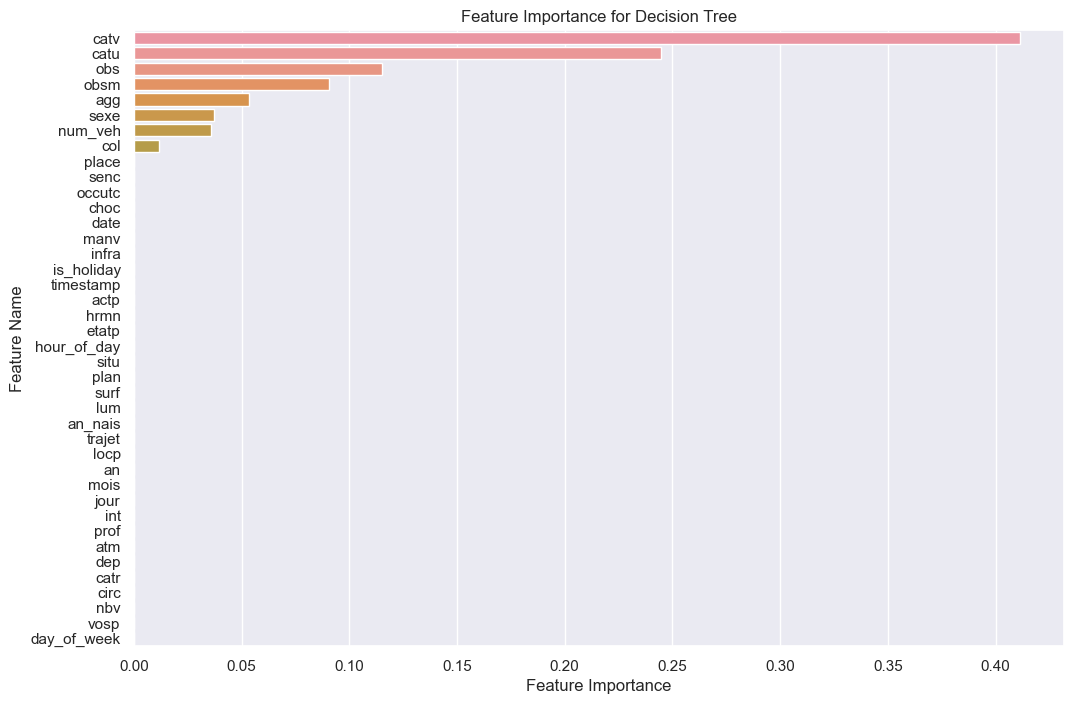

In [51]:
# estimate the feature importance for the model
import numpy as np

# Access feature importances from the trained model
importances = tree.feature_importances_

feature_names = df.drop(columns=['severe']).columns.tolist()

# Check the lengths of feature_names and importances
print("Length of feature_names:", len(feature_names))
print("Length of importances:", len(importances))

# Create a DataFrame to hold feature names and their importances
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Sort the features by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Create a bar plot to visualize feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.xlabel('Feature Importance')
plt.ylabel('Feature Name')
plt.title('Feature Importance for Decision Tree')
plt.show()





In [45]:
from sklearn.model_selection import KFold, cross_val_score
# Perform cross-validation with F1 score
f1_scores = cross_val_score(tree, X_train, y_train, scoring='f1_macro', cv=5, n_jobs=2)

# Print the F1 scores for each fold
print("F1 Scores (Cross-Validation):", f1_scores)

# Calculate and print the mean F1 score
mean_f1_score = f1_scores.mean()
print("Mean F1 Score (Cross-Validation):", mean_f1_score)

F1 Scores (Cross-Validation): [0.76285987 0.76119739 0.76230944 0.76544354 0.75820382]
Mean F1 Score (Cross-Validation): 0.7620028118157416
